# Statistique sur examen module 3A
Je m'intéresse à l'évolution des notes sur l'ensemble des année soit de 2001 à 2020 (Il manque les notes des années 2002 et 2003 introuvables ???).
## Création de la base de données
### Lecture fichier CVS obtenue à partir des fichiers excel annuels

In [1]:
# Récupération de données d'un ficier CSV
# Attention!!!!!!!
# Le separateur doit etre ";" lors de la création du ficier CSV dans EXCEL

###################################################
# Importation des modules utilisés
import csv  #module pour lecture format CSV
import matplotlib.pyplot as plt
import numpy as np

# Nom du fichier à traiter
nomfichier='base_notes.csv'

###################################################
# Lecture des données du fichier stockées alors dans Data

Data=[]
with open(nomfichier, newline='') as csvfile:
    DataBrute = csv.reader(csvfile, delimiter=';')
    Data = [row for row in DataBrute] 
print(Data)

[['Notes\\Année', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''], ['2001', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'], ['17.0833333333333', '26.2820512820513', '15', '11', '7.5', '10', '10', '9.5', '11.5', '7', '11', '13.5', '13.5', '15', '13.5', '7.5', '10.5', '14'], ['15.4166666666667', '23.7179487179487', '9', '12.5', '14', '9', '12', '12.5', '10.5', '11.5', '13', '15.5', '17', '10', '13', '16.5', '8.5', '11'], ['6.66666666666667', '10.2564102564103', '16.5', '11.5', '9', '13', '15', '10.5', '12.5', '12.5', '15.5', '10.5', '18', '13.5', '16.5', '15', '7.5', '11'], ['10', '15.3846153846154', '1', '11', '12', '15', '15', '16', '9', '8.5', '12.5', '6.5', '14', '17', '14', '17.5', '10.5', '11'], ['10', '15.3846153846154', '15.5', '16.5', '9', '14', '16', '10', '10', '12', '13', '14.5', '14.5', '11.5', '8', '12', '9', '15'], ['8.33333333333333', '12.8205128205128', '18.5', '8

## Mise en forme des donnée pour exploitation dans python
### Vérification du format des données

In [2]:
nom = Data[0][0]
print(nom)

Notes\Année


### Affichage des années disponibles et de leur nombre

In [3]:
annees = Data[1][:] 
print(annees)
nbr_annees=len(Data[1][:])
print('Nombre d\'années disponibles', nbr_annees)

['2001', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Nombre d'années disponibles 18


### Construction d'un tableau 2D des notes triees par année
**Attention la numérotation des colonnes débute à 0**

In [4]:
Data_triees=[]
for i in range(0,nbr_annees):    
    # Recherche de la colonne de l'année dans la base de notes
    colonne_annee = ''    
    if Data[1][i] == str(annees[i]):
        colonne_annee = i
        text = ['notes_'+ str(annees[i])]
    
    Data_annee = [round(float(Data[j][colonne_annee]),2) for j in range(2,len(Data)) if Data[j][colonne_annee]!='']
    Data_triees.append([annees[i],Data_annee])
    #print('colonne de l\'année',colonne_annee+1,'\n',text, Data_annee)
print('\n Tableau final rangé : \n')
print(Data_triees)


 Tableau final rangé : 

[['2001', [17.08, 15.42, 6.67, 10.0, 10.0, 8.33, 13.33, 10.0, 11.25, 7.08, 14.58, 7.92, 2.92, 12.92, 12.08, 7.08, 14.58, 13.75, 12.08, 5.42, 7.5, 13.75, 5.83, 9.58, 11.25, 13.75, 14.58, 13.75, 6.25, 7.08, 12.92, 7.08, 16.25, 17.5, 10.0, 6.67, 14.58, 10.42]], ['2004', [26.28, 23.72, 10.26, 15.38, 15.38, 12.82, 20.51, 15.38, 17.31, 10.9, 22.44, 12.18, 4.49]], ['2005', [15.0, 9.0, 16.5, 1.0, 15.5, 18.5, 12.5, 15.5, 5.0, 16.5, 16.0, 12.0, 6.0, 12.5, 13.0, 16.5, 3.5]], ['2006', [11.0, 12.5, 11.5, 11.0, 16.5, 8.0, 12.0, 16.5, 6.0, 13.0, 10.0, 10.5, 14.5, 13.5, 8.0, 12.5, 15.0, 12.5, 16.0, 13.0, 11.5, 9.5]], ['2007', [7.5, 14.0, 9.0, 12.0, 9.0, 12.5, 11.0, 9.0, 15.0, 12.5]], ['2008', [10.0, 9.0, 13.0, 15.0, 14.0, 12.0, 11.0, 11.0, 15.0, 8.0, 17.0, 14.0, 13.0, 14.0, 11.0, 6.0, 10.0, 15.0, 10.0]], ['2009', [10.0, 12.0, 15.0, 15.0, 16.0, 17.0, 13.0, 12.0, 14.0, 13.0, 11.0, 11.0, 11.0, 16.0, 12.0, 13.0]], ['2010', [9.5, 12.5, 10.5, 16.0, 10.0, 10.5, 9.0, 14.5, 14.5, 9.5,

## Exploitation des données (notes/annees)

### Calcul du nombre d'élèves par année et affichage sous forme d'une courbe 2D

(0, 40)

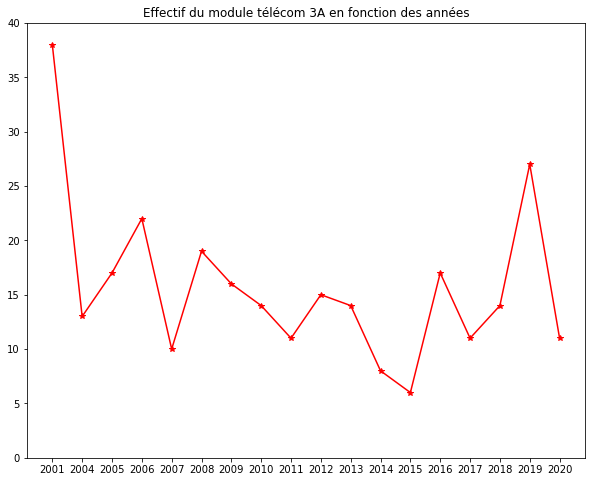

In [5]:
%matplotlib inline
effectif=[len(Data_triees[i][1]) for i in range(0,nbr_annees)]
#print(effectif)
#print (annees)
plt.figure(1,figsize=(10, 8))
plt.title("Effectif du module télécom 3A en fonction des années")
plt.plot(annees,effectif,'*-',color='red')
plt.ylim(0, 40)

### Calcul de la moyenne des notes par année et affichage sous forme d'une courbe 2D

[10.82, 15.93, 12.03, 12.02, 11.15, 12.0, 13.19, 11.25, 11.27, 12.03, 12.39, 12.0, 15.92, 14.12, 13.41, 13.86, 13.2, 12.77]


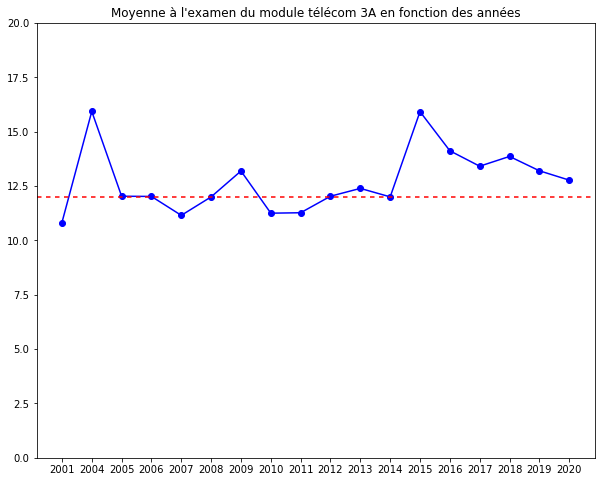

In [6]:
moyenne= [round(np.mean(Data_triees[i][1]),2) for i in range(0,nbr_annees)]
print(moyenne)
#print (annees)
plt.figure(2,figsize=(10, 8))
plt.title("Moyenne des notes à l'examen du module Télécom 3A en fonction des années")
plt.plot(annees,moyenne,'o-',color='blue')
plt.ylim(0, 20)
plt.axhline(y=12,color='red',dashes=(3,3))

### Calcul des écart-types des notes par année et affichage sous forme d'une courbe 2D

[3.68, 6.1, 5.25, 2.76, 2.46, 2.81, 2.1, 2.41, 1.66, 2.66, 2.6, 4.11, 2.18, 2.46, 2.88, 3.68, 3.57, 2.49]


(0, 10)

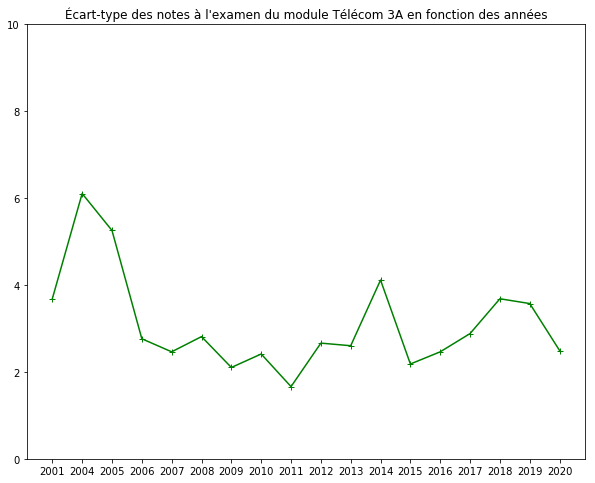

In [9]:
ecart_type= [round(np.std(Data_triees[i][1],0, ddof = 1),2) for i in range(0,nbr_annees)]
print(ecart_type)
#print (annees)
plt.figure(3,figsize=(10, 8))
plt.title("Écart-type des notes à l'examen du module Télécom 3A en fonction des années")
plt.plot(annees,ecart_type,'+-',color='green')
plt.ylim(0, 10)
#plt.axhline(y=12,color='red',dashes=(3,3))numpy.std(a, 0, ddof = 1)

### Tracé de la moyenne des notes à l'examen en fonction des effectifs des année

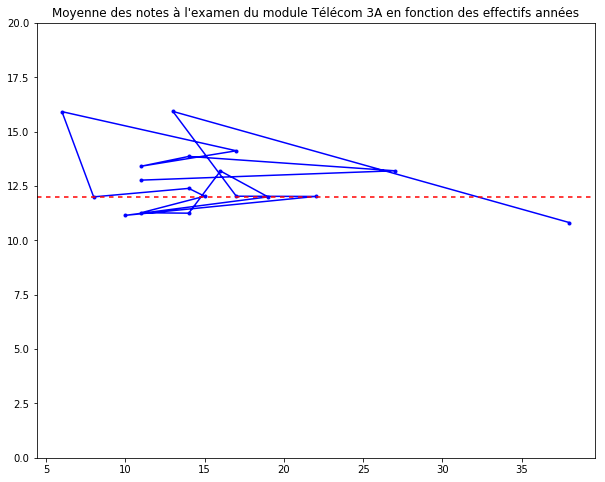

In [10]:
plt.figure(4,figsize=(10, 8))
plt.title("Moyenne des notes à l'examen du module Télécom 3A en fonction des effectifs années")
plt.plot(effectif,moyenne,'.-',color='blue')
plt.ylim(0, 20)
plt.axhline(y=12,color='red',dashes=(3,3))